In [2]:
import ddu_dirty_mnist as ddu
import torch
import matplotlib.pyplot as plt

from main.prepare_data import create_dataloaders
from dataclasses import dataclass
from torchvision.utils import make_grid


%reload_ext autoreload
%autoreload 2

In [3]:
train_dirty = ddu.DirtyMNIST(root='./data', train=True)
test_dirty = ddu.DirtyMNIST(root='./data', train=False)

In [4]:
len(train_dirty), len(test_dirty)

(120000, 70000)

In [4]:
dirty_mnist_train_dataloader = torch.utils.data.DataLoader(
    train_dirty,
    batch_size=128,
    shuffle=True,
    num_workers=0,
    pin_memory=False,
)
dirty_mnist_test_dataloader = torch.utils.data.DataLoader(
    test_dirty,
    batch_size=128,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
)

In [5]:
# set configurations
@dataclass
class ActiveLearningConfigMNIST:
    subset_of_weights: str = 'last_layer'
    hessian_structure: str = 'kron'
    backend: str = 'AsdlGGN'
    temperature: float = 1
    max_training_samples: int = 500
    acquisition_batch_size: int = 100
    al_method: str = 'random'
    test_batch_size: int =512
    num_classes: int = 10
    num_initial_samples: int = 50
    training_iterations: int = 4096 * 6
    scoring_batch_size: int = 64
    train_batch_size: int = 64
    extract_pool: int = 55000  # number of samples to extract from the dataset (bit of a hack)
    dataset: str = 'fashion_mnist'


In [6]:
train_loader, test_loader, pool_loader, active_learning_data = create_dataloaders(config=ActiveLearningConfigMNIST())

100%|██████████| 26421880/26421880 [00:01<00:00, 22937032.61it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1794831.06it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 12654916.30it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw




c:\Users\vince\Documents\Statistics\TT\msc_thesis\.venv\Lib\site-packages\torch\utils\data\sampler.py:64: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom implementation that utilizes it.
  warnings.warn("`data_source` argument is not used and will be removed in 2.2.0."


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.81019837..2.0226629].


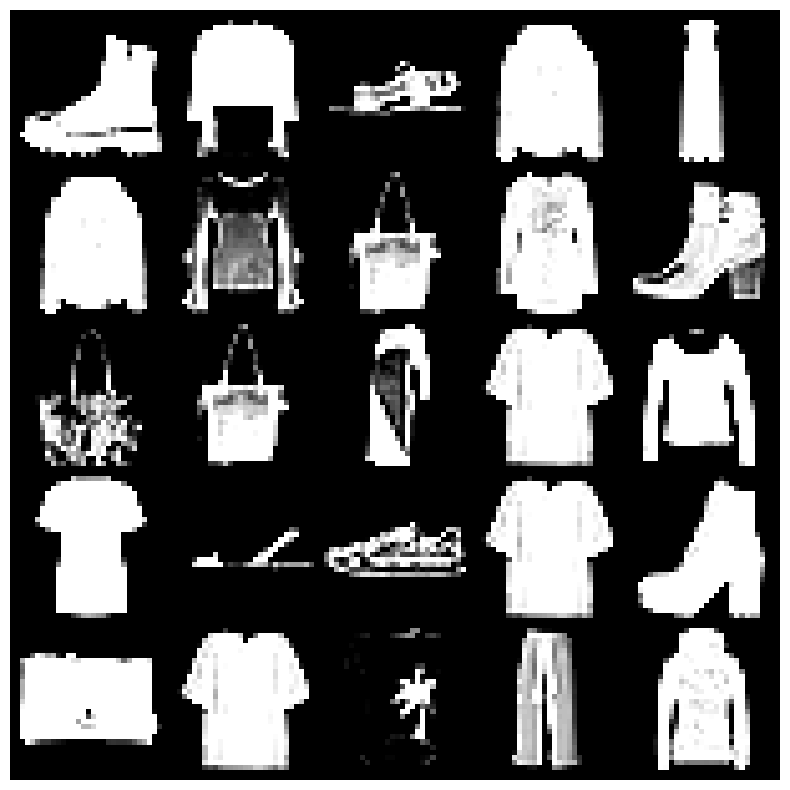

In [12]:

# Get a batch of images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
img_grid = make_grid(images[:25], nrow=5)

# Convert the tensor to numpy array and transpose dimensions
img_grid = img_grid.numpy().transpose((1, 2, 0))

# Plot the grid
plt.figure(figsize=(10, 10))
plt.imshow(img_grid, cmap='gray')
plt.axis('off')
plt.show()